![Banner](./img/AI_Special_Program_Banner.jpg)


This is an abridged version of chapter 3 of the book by [Sebastian Raschka](http://sebastianraschka.com), 2015 (with some modifications)

https://github.com/rasbt/python-machine-learning-book

# Classification with Scikit-Learn
---

As mentioned in the theoretical part, our classifier is essentially a *function* that maps a data set to a *class* and thus generates a *prediction* based on the information contained in the data. The function we are looking for is usually *optimal* in some sense. Depending on the *principle* of each method and its corresponding *optimization criterion*, we get different classifiers. Here we will look at some approaches.

## Table of contents
---

- [Rosenblatt's Perceptron](#Rosenblatt's-Perceptron)
    - [Theory of perceptron](#Theory-of-perceptron)
    - [Selection of a classification algorithm](#selection-of-a-classification-algorithm)
    - [Perceptron with `scikit-learn`](#Perceptron-with-scikit-learn)
- [Modeling of class probabilities via logistic regression](#Modeling-of-class-probabilities-via-logistic-regression)
    - [Theory of logistic regression](#Theory-of-logistic-regression)
    - [Logistic regression with `scikit-learn`](#Logistic-regression-with-scikit-learn)
- [Decision Trees](#Decision-Trees)
    - [Theory of decision trees](#Theory-of-decision-trees)
    - [Decision Trees with `scikit-learn`](#Decision-Trees-with-scikit-learn)
- [K-Nearest-Neighbor-Algorithm - a "lazy learning" algorithm](#K-Nearest-Neighbor-Algorithm-a-"lazy-learning"-algorithm)
    - [Theory to KNN](#Theory-to-KNN)
    - [KNN with `scikit-learn`](#KNN-with-scikit-learn)
- [Learning outcomes](#Learning-outcomes)

# Rosenblatt's Perceptron
---

For displaying the images in the notebook:

In [1]:
from IPython.display import Image
%matplotlib inline

The following material is a brief repetition of chapter 2 of the book by [Sebastian Raschka](http://sebastianraschka.com).

We look at perhaps the oldest ML algorithm: the perceptron. In 1943, in an attempt to understand how the biological brain works in order to develop artificial intelligence, Warren McCulloch and Walter Pitts published the first concept of a simplified brain cell, the so-called [McCulloch-Pitts (MCP) neuron](https://link.springer.com/article/10.1007/BF02478259). Frank Rosenblatt then put this idea into practice a few years later in 1957 by developing an algorithm with which the MCP could be trained and thus *learned*. In the following, we will therefore look at the MCP neuron with Rosenblatt's [learning rule](https://blogs.umass.edu/brain-wars/1957-the-birth-of-cognitive-science/the-perceptron-a-perceiving-and-recognizing-automaton/).

## Theory of perceptron
---

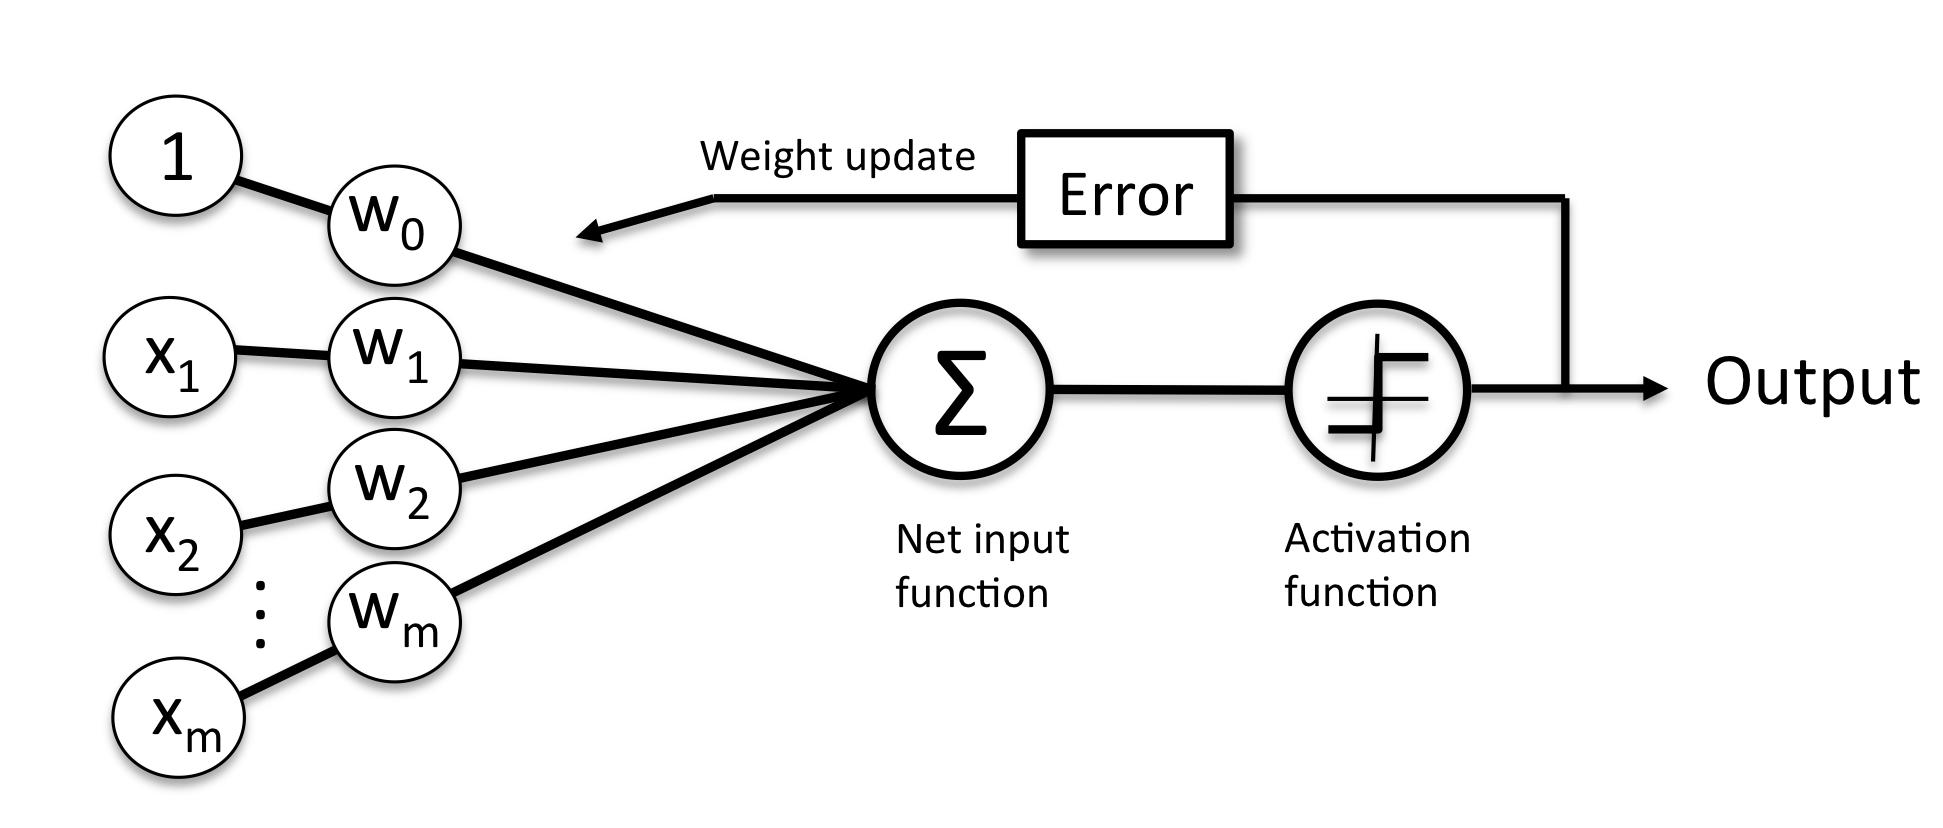

In [2]:
Image(filename='img/02_04.png', width=600) 

With an *activation threshold* $\theta$, the [perceptron learning rule](https://blogs.umass.edu/brain-wars/1957-the-birth-of-cognitive-science/the-perceptron-a-perceiving-and-recognizing-automaton/) with the 

*weight vector* $\mathbf{w}=(w_0=\theta,w_1,\dots,w_m)^T$ and the 

*input vector* $\mathbf{x}=(x_0=1,x_1,\dots,x_m)^T$ 

then calculates
* the *net input z* of the perceptron: $z=\mathbf{w}^T\mathbf{x}=\sum_{j=0}^m w_j\cdot x_j$
* the *activation function* as a *staircase function*
$$\varPhi(z) = \left\{\begin{array}{rl} 1 & \text{ if } z\geq 0\\-1 & \text{ else}\end{array}\right.$$

The actual learning rule is then with $n_t$ (number of training data) and a *correct prediction ($\hat=$ true class)* $y^{(i)}\in\{1,-1\}$ for the $i$-th data set $\mathbf{x}^{(i)}$:

1. Initialize the weights with 0 or small random numbers.
2. Perform the following steps for each of the $n_t$ training datasets $\mathbf{x}^{(i)}$:
    1. Calculate the output ($\hat=$ *predicted*) value  
    $\hat y^{(i)}=\varPhi(z^{(i)})\in\{1,-1\}$
    2. Update the weights with *learning rate* $\eta$ as  
    $w_j^\text{new} := w_j + \Delta w_j$, where $\Delta w_j=\eta\cdot(y^{(i)} - \varPhi(z^{(i)}))\cdot x_j^{(i)}$ (all simultaneously)
    
Note that the update rule means that the weights remain *unchanged* if the prediction is correct. If it is wrong, the weights are adjusted in the direction of the ground truth.

### Modification: ADAptive LInear NEuron (Adaline)

Nach [Widrow et. al](http://www-isl.stanford.edu/~widrow/papers/t1960anadaptive.pdf).

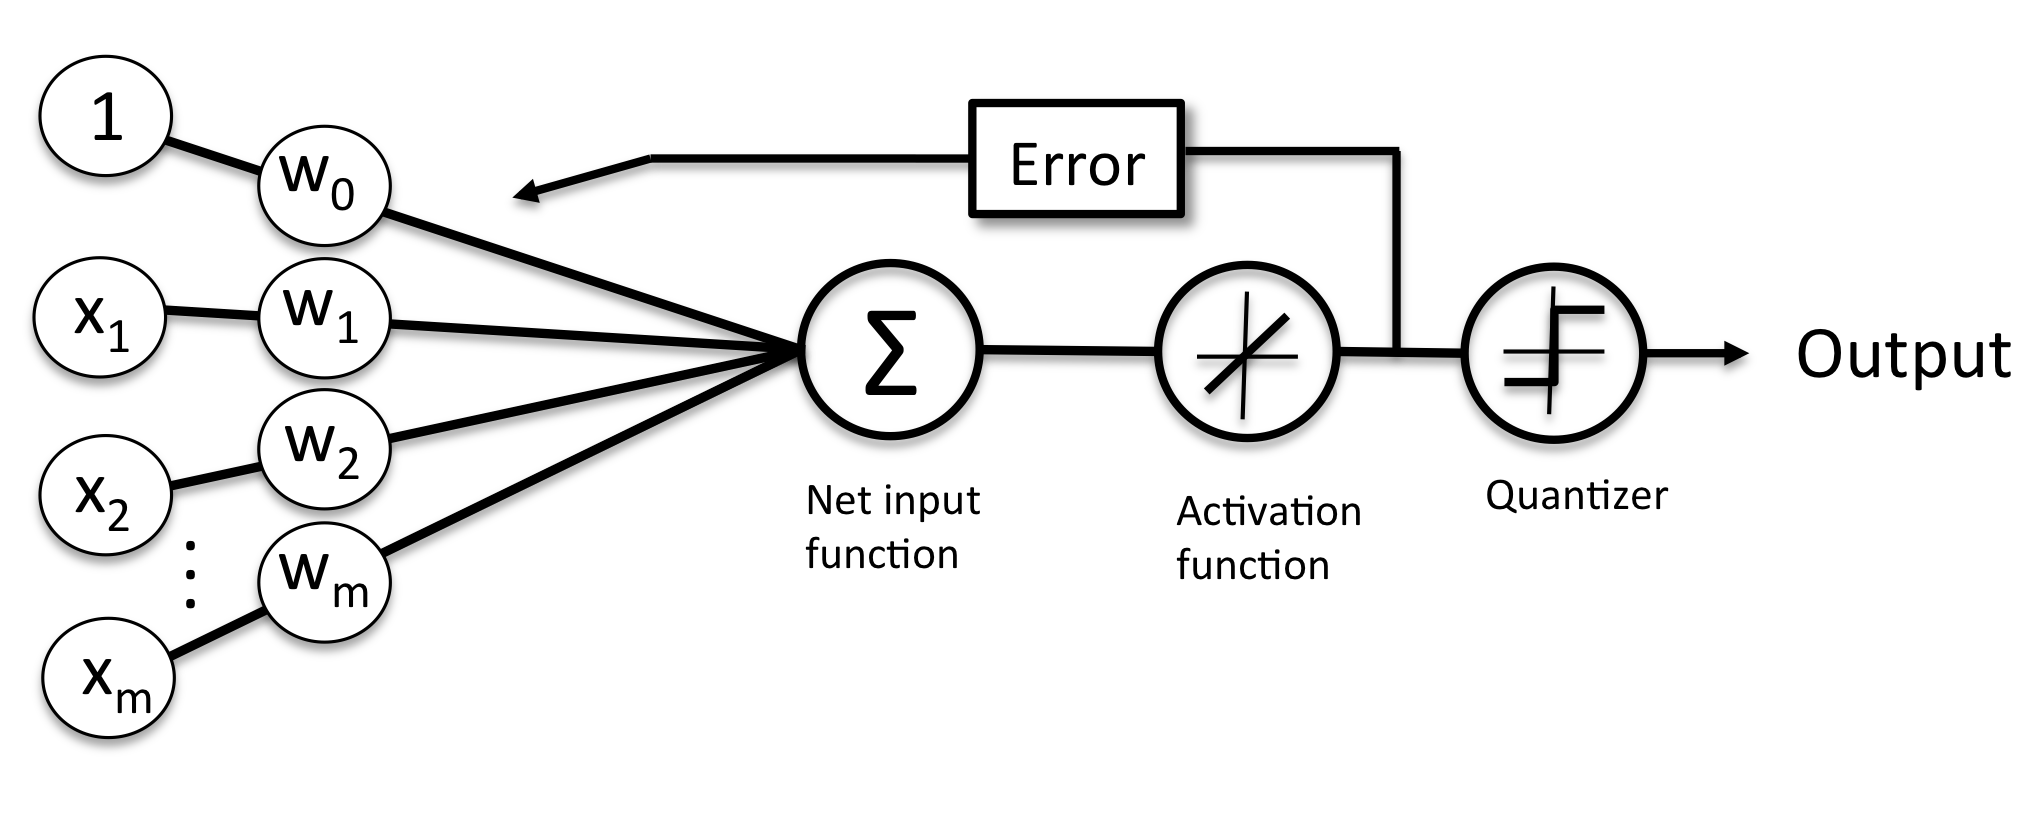

In [3]:
Image(filename='img/02_09.png', width=600) 

Differences to Rosenblatt's approach:
1. Activation function $\varPhi(z)$ is now the input of the network itself is, i.e. $\varPhi(z)=z\qquad\rightarrow$ Update of weights.
2. Use of a *quantizer* function for the prediction of a class

### Key concept: Minimization of *cost functions* by means of *gradient descent*

In *supervised learning*, an *objective function* is optimized; usually a *cost function* $J(\mathbf{w})$ (which is to be minimized)

Update of the weights, e.g., $\mathbf{w}^\text{new}:=\mathbf{w}+\Delta\mathbf{w}$, with
$$\Delta\mathbf{w}=-\eta\cdot\nabla J(\mathbf{w})\>,$$
i.e. the *adjustment of the weights* is the negative gradient of the cost function multiplied by the *learning rate*.

#### Cost function for Adaline

With Adaline, the **Sum of Squared Errors** (**SSE**) is minimized, i.e

$$J(\mathbf{w})=\frac12\sum_{i=1}^{n_t} \left(y^{(i)} - \varPhi(z^{(i)})\right)^2$$

This leads to the *update rule* of the weights (when using the [*stochastic gradient descent*](https://en.wikipedia.org/wiki/Stochastic_gradient_descent); for a derivation see Raschka's book, chapter 2):

$$w_j^\text{new} := w_j + \Delta w_j,\text{ where }\Delta w_j=\eta\cdot(y^{(i)} - \varPhi(z^{(i)}))\cdot x_j^{(i)} \text{ (all at the same time)}$$

This looks exactly like Rosenblatt, **but** $\varPhi(z^{(i)})=\mathbf{w}^T\mathbf{x}^{(i)}$ is now a real number and not a class label.

### Disadvantages of perceptrons and Adaline

* The methods only converge if the training data is *linearly separable* and a suitable *learning rate* is selected.
* Usually, simple neural classifiers are not very powerful.
* These are *binary* models, so that *multi-class problems* must be treated with **[One-versus-Rest](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest)** (**OvR**).

We will take a closer look at the theoretical aspects of this type of classifier later (lesson on simple neural networks). Now let's take a look at the implementation in `scikit-learn`.

## Selection of a classification algorithm
---

* The performance of a classifier strongly depends on the problem under consideration. There is no *one fits all* for all classification problems, see [No Free Lunch Theorem](#No-Free-Lunch-Theorem)
* Recommendation: Try out some methods and compare the performance
* Mainly five steps:
    1. Selection of features (*Feature Selection*)
    2. Selection of the performance metric
    3. Selection of the classifier and the optimization algorithm
    4. Evaluation of the performance of the model
    5. Adaptation of the model (*tuning*)
    
In this section, we will only look at how classifiers work.

### No Free Lunch Theorem
In a famous 1996 paper, [David Wolpert](https://direct.mit.edu/neco/article/8/7/1341/6016/The-Lack-of-A-Priori-Distinctions-Between-Learning) shows that there is no reason to prefer one model over another if you make absolutely no assumptions about the nature of the data at hand. This is known as the No Free Lunch Theorem (NFL). For some data sets, the best model may be a linear model, while for other data sets it may be a neural network. There is no model that is *a-priori* guaranteed to work better (hence the name of the theorem...). The only way to find out which model works best is to evaluate all models. Since this is not possible, in practice you make some reasonable assumptions about the data and evaluate only a few reasonable models. For simple tasks, for example, you can evaluate linear models with different levels of regularization and for a complex problem you can evaluate different neural networks.

## Perceptron with `scikit-learn`
---

Now let's take a look at the implementation in `scikit-learn`. First, however, we will import a sample data set.

### First steps with `scikit-learn`

#### Importing sample data
Loading the iris data set from scikit-learn. Here, the third column represents the petal length and the fourth column the petal width of the flower samples. The classes are already converted into integer labels, where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Data split into 70% training data and 30% test data:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Standardization of features:

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# for later use
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#### A practical function for visualization

Define `plot_decision_regions` from chapter 2 (used for all classifiers):

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
# import warnings

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'P', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='None',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

### Training of the perceptron

Import of the perceptron classifier from `sklearn` and training (uses **OvR** method for multiclass problem as default):

In [8]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, tol=1e-3, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40)

How many test data sets are available? That should be $150 \cdot 30\% = 45$?

In [9]:
y_test.shape

(45,)

Predict the classes for the test data and compare the true class labels `y_test` with the predicted labels `y_pred`:

In [10]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 5


How good is the classification? (we expect an accuracy of $1-\frac{5}{45}\approx 0.89$):

In [11]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.89


**Note:** High accuracy does not necessarily make a good classifier!

Plot of the *decision regions*:

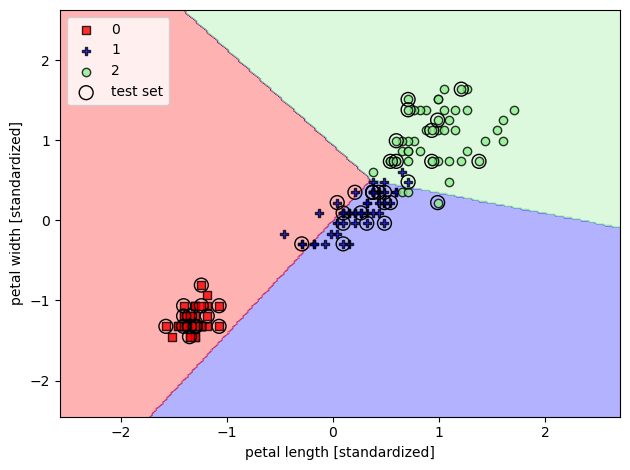

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

**Note**: The classes are not linearly separable, so the perceptron will not converge!

# Modeling of class probabilities via logistic regression
---

Features of logistic regression
* easy to implement
* widely used in the industry
* good performance on linearly separable classes
* linear model for binary classification ($\rightarrow$ *OvR* for multiclasses)

**Note:** In contrast to *linear regression* or *ridge regression* (see also our ML introduction), this is a *classification algorithm*!

## Logistic regression theory
---

### Concept: *Quota ratio*

Let $p$ be the probability for the *positive event* ($\hat=$ result we want to predict); for binary classification this corresponds to the class label $y=1$.  
This is the *odds ratio*
$$\frac p{1-p}$$
This gives us the probability of occurrence for the event.

### Concepts: *Logit function*, conditional probabilities and the *sigmoid function*

The logit function is the logarithm of the *ratio of odds*, i.e.

$$\text{logit}(p)=\log\frac p{1-p}=:z
\qquad\leftrightarrow\qquad
p=\frac1{1+e^{-z}}=:\varPhi(z)\quad\text{(sigmoid function)}
$$

i.e. $\text{logit}: (0,1) \mapsto \mathbb{R}$; $\varPhi: \mathbb{R}\mapsto (0,1)$

With $\mathbf{x}$ as the data sample, $p(y=1\mid\mathbf{x})$ denotes the *conditional probability* that the sample belongs to class 1 with the features $x_0,x_1,\dots,x_m$. Then
$$\text{logit}\left(p(y=1\vert\mathbf{x})\right)=\sum_{j=0}^m w_jx_j = \mathbf{w}^T\mathbf{x}=:z\quad\text{(net input)}$$
and
$$p(y=1\vert\mathbf{x})=\varPhi(z)=\frac1{1+e^{-z}}$$

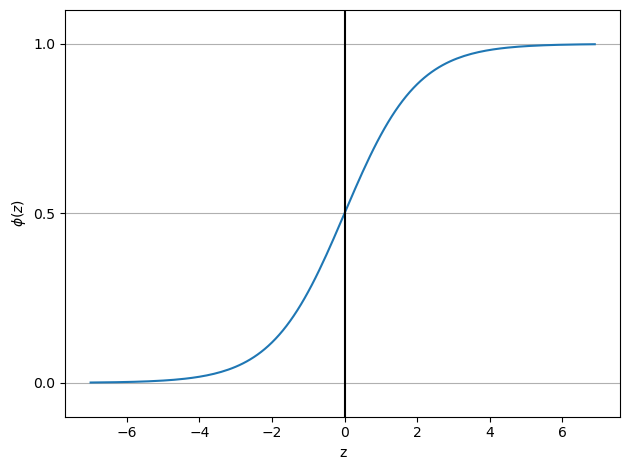

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

**Comparison** with Perzeptron and Adaline:

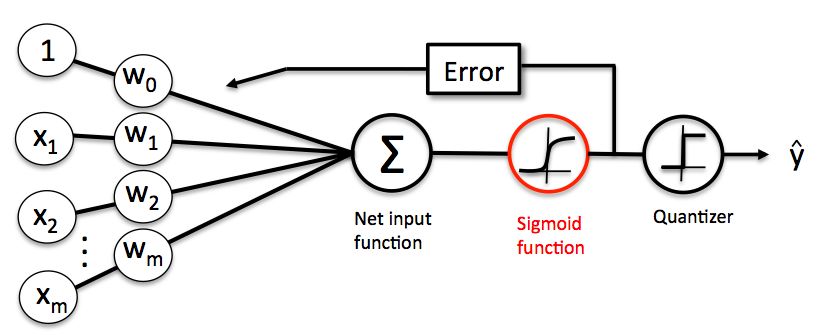

In [14]:
Image(filename='./img/03_03.png', width=500) 

Predicted class $\hat y$ (threshold value):
$$\hat y = \left\{\begin{array}{rl} 1 & \text{ if } \varPhi(z)\geq 0.5\\0 & \text{ else}\end{array}\right.
\qquad\leftrightarrow\qquad
\hat y = \left\{\begin{array}{rl} 1 & \text{ if } z\geq 0\\0 & \text{ else}\end{array}\right.
$$
but $\varPhi(z)$ even gives us the *class probability*!

### Objective function of the logistic regression

Maximization of the *likelihood* $L(\mathbf{w})$ as a function of the weights, where
$$
L(\mathbf{w}) = P(\mathbf{y}\vert\mathbf{x};\mathbf{w}) = \prod_{i=1}^{n_t} P(y^{(i)}\vert x^{(i)};\mathbf{w})
= \prod_{i=1}^{n_t} \left(\varPhi(z^{(i)})\right)^{y^{(i)}}\cdot\left(1-\varPhi(z^{(i)})\right)^{1-y^{(i)}}
$$
(assuming that the individual samples in the data set are independent)

**Hint**: $$y^{(i)}\in\{0,1\}\quad\Rightarrow \phi^{y^{(i)}}\in\{1,\phi\}$$

Instead, maximize the *log-likelihood*
$$
l(\mathbf{w}):=\log L(\mathbf{w}) = \sum_{i=1}^{n_t}\left[y^{(i)}\log\left(\varPhi(z^{(i)})\right)
  + (1-y^{(i)})\log\left(1-\varPhi(z^{(i)})\right)\right]
$$
or minimize the *negative log-likelihood*, which serves as the *cost function* of the logistic regression
$$
J(\mathbf{w}):=-l(\mathbf{w}) = \sum_{i=1}^{n_t}\left[-y^{(i)}\log\left(\varPhi(z^{(i)})\right)
  - (1-y^{(i)})\log\left(1-\varPhi(z^{(i)})\right)\right]
$$

For a single sample $\mathbf{x}$, this is
$$
J(\mathbf{w})=-y\log\left(\varPhi(z)\right) - (1-y)\log\left(1-\varPhi(z)\right) =
  \left\{\begin{array}{ll} -\log\left(\varPhi(z)\right) & \text{ if } y = 1\\-\log\left(1-\varPhi(z)\right) & \text{ if } y=0\end{array}\right.
$$

### Learning the weights of the logistic cost function

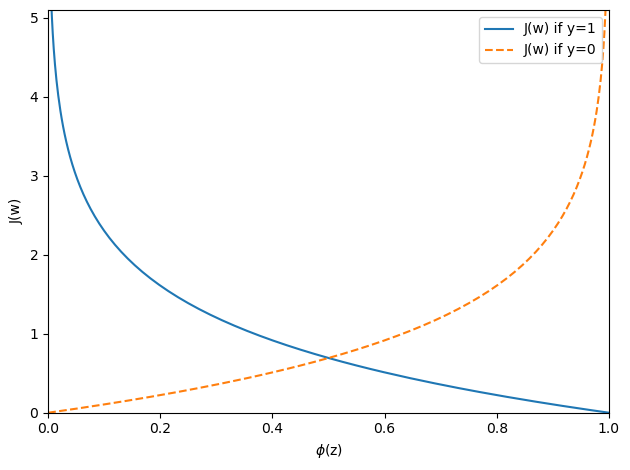

In [15]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()

The costs for a correct prediction are therefore low ($\varPhi(z)$ is close to the class value), but (very) high costs for incorrect predictions $\rightarrow$ incorrect predictions lead to ever higher costs

#### Update rule for weights

The formula is again the same as before and is $\mathbf{w}^\text{new}:=\mathbf{w}+\Delta\mathbf{w}$, where
$\Delta\mathbf{w}=-\eta\cdot\nabla J(\mathbf{w})$, i.e.
$$
\Delta w_j = -\eta\frac{\partial J}{\partial w_j}=\eta\sum_{i=1}^{n_t}\left(y^{(i)}-\varPhi(z^{(i)})\right)x_j^{(i)}
$$
In contrast to Perceptron or Adaline, $\varPhi$ is now the sigmoid function (giving class probabilities).

## Logistic regression with `scikit-learn`
---

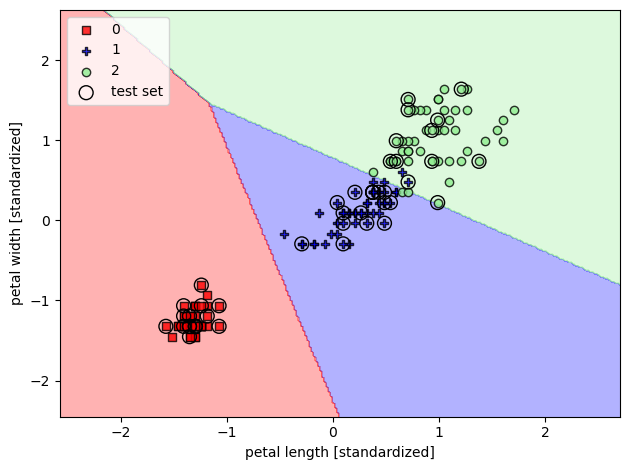

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='liblinear',multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

Check the prediction of the first sample:

In [17]:
lr.predict_proba(X_test_std[:1, :])

array([[2.77475804e-08, 6.31730607e-02, 9.36826912e-01]])

This means that the first sample has a 93.7% probability of being an Iris virginica, and a 6.3% probability of being an Iris versicolor (and notably that we actually get *class probabilities*!)

### Dealing with overfitting through regularization

**Supplementary to the material from Raschka**: Here it is worth taking another look at our introductory material on machine learning, in which we look at the [Bias-Variance-Tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) and demonstrate the usefulness of regularization in the context of [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization).

So there are two possible problems
* *high bias* (*underfitting*): the model is not complex enough to recognize patterns in the data $\rightarrow$ *systematic error* that is not due to randomness
* *high variance* (*overfitting*): the model is too complex and models the training data well, but does not generalize $\rightarrow$ Sensitivity to randomness

Both lead to low performance on unseen data, i.e. poor predictions.

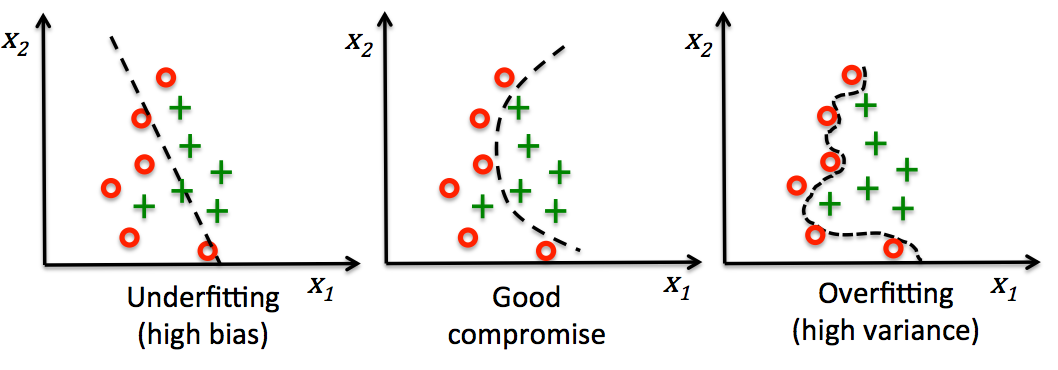

In [18]:
Image(filename='./img/03_06.png', width=700) 

#### L2 regularization

also *Weight Decay* with *Regularization parameter* $\lambda$

$$
\frac\lambda2\lVert\mathbf{w}\rVert^2=\frac\lambda2\sum_{j=1}^mw_j^2=: r(\mathbf{w})
$$

Instead of the cost function $J(\mathbf{w})$, we now use $\tilde J(\mathbf{w}):=J(\mathbf{w})+r(\mathbf{w})$, i.e. we add a regularization term to the cost function. We therefore penalize large values of the weights

It is even more common to use a parameter $C:=\frac1\lambda$ and the regularized cost function
$$
J_{\text{reg}}(\mathbf{w}) := C\cdot J(\mathbf{w})+\frac12\lVert\mathbf{w}\rVert^2
$$
to be used.

To *reduce* $C$ therefore means to *increase* $\lambda$ and thus the *strength of the regularization*

Let us consider the effect of different orders of magnitude of $C$.

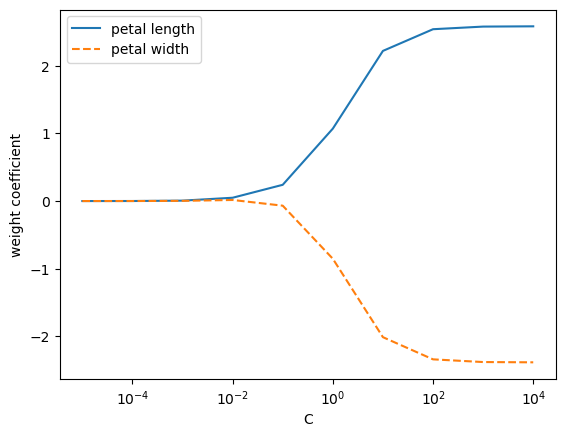

In [18]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c, random_state=0, solver='liblinear',multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

Obviously, the weight coefficients become smaller if $C$ is reduced (i.e. $\lambda$ is increased).

# Decision Trees
---

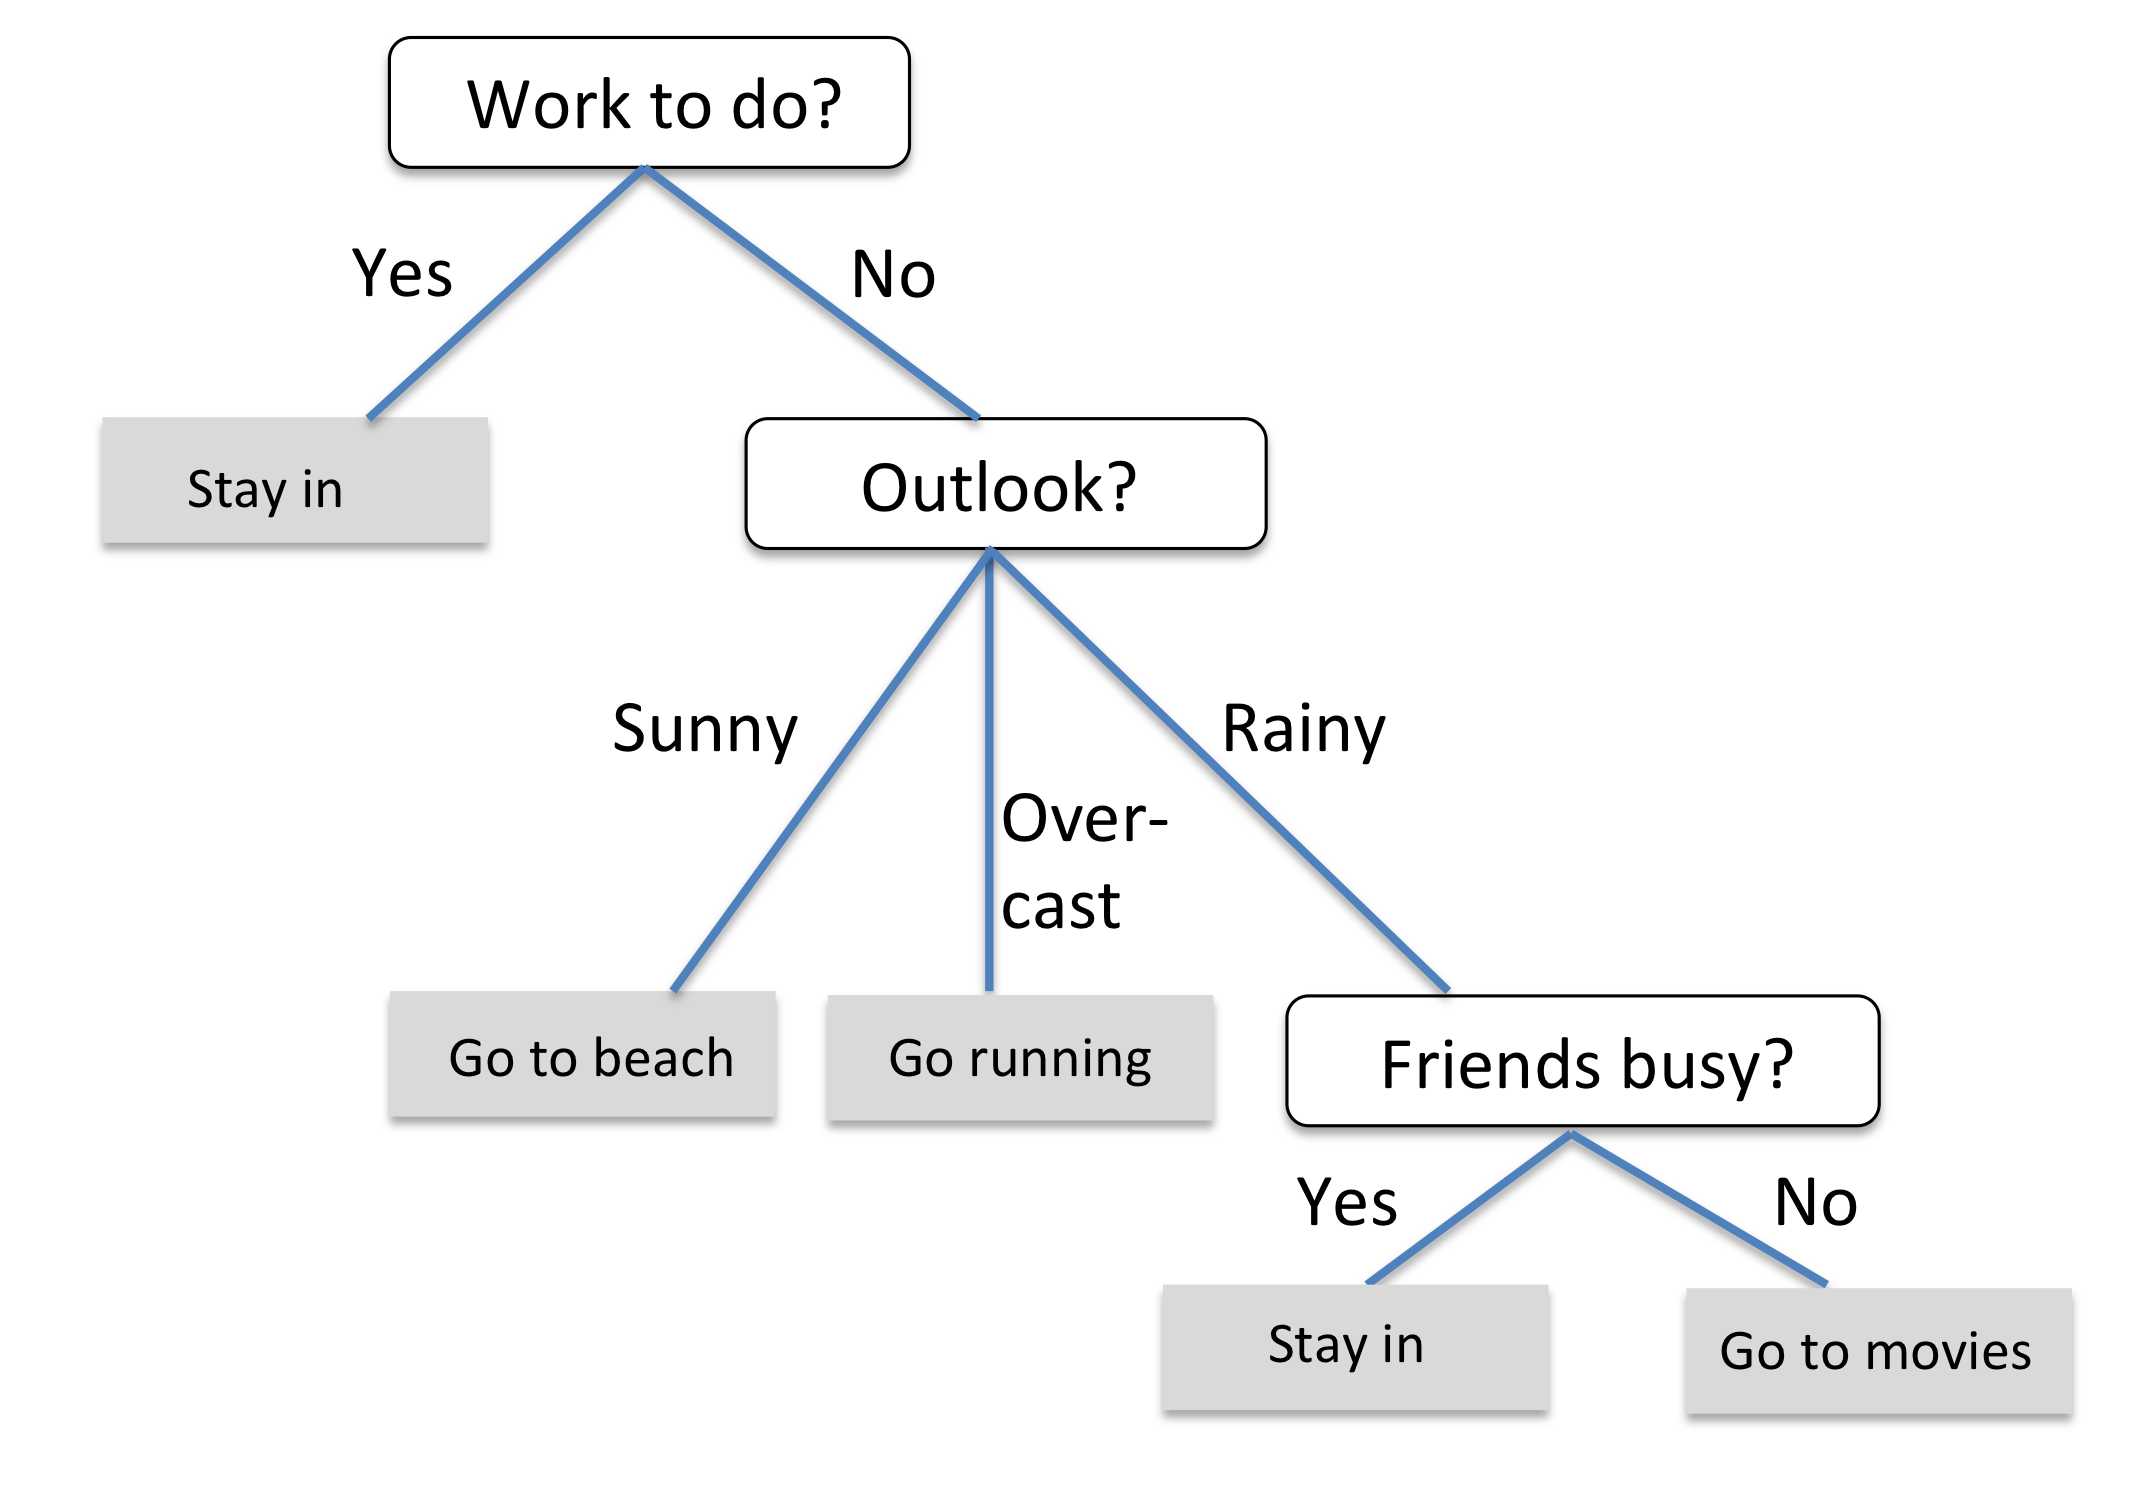

In [20]:
Image(filename='./img/03_15.png', width=500) 

Decision trees
* are among the most frequently used methods
* are easy to interpret
* decide on class membership by asking a series of questions

**Task**: Finding the *right questions*!

For Iris dataset: find cut-off values for the features to construct the tree

<u>*Tree structure*</u>
* *root node*: contains all data samples
* *inner node*: contains part of the data samples and is *impure*, i.e. contains samples with different class memberships
* *leaf node*: is *pure*, i.e. all samples in a leaf belong to the same class

The nodes are constructed *from top to bottom* by splitting impure nodes with the help of the right questions and thus becoming purer and purer the deeper we go into the tree.

**Task concretization**: Which question leads to the greatest additional insight or *information gain* at a non-leaf node? To find this out, we need a measure for the *impurity* $I(D)$ of the data set $D$ at the node in question.

## Theory of decision trees
---

### Maximization of information gain

#### Gain information
Let
* $f$ is the feature on which the *split* is to be made (i.e. the feature for which a question is to be asked)
* let $D_p$ be the *parent node*, i.e. the node under consideration with $n_p$ elements in its data set
* $D_k,k=1,2,l$ are the *children* of the parent node after the (potential) split at $D_p$ with $n_k$ elements in their respective data sets

Obviously, we then have $\sum_{k=1}^l n_k = n_p$.

Then the **information gain** at the parent node with respect to the feature $f$ is defined as the *decrease in impurity*, i.e.

$$ G(D_p,f) = I(D_p) - \sum_{k=1}^l \frac{n_k}{n_p}I(D_k) $$

Often there are only *binary* splits in the tree, so that there are only two children, namely the one on the *left* side called $D_l$ and the one on the right side called $D_r$, so that the formula becomes

$$ G(D_p,f) = I(D_p) - \frac{n_l}{n_p}I(D_l) - \frac{n_r}{n_p}I(D_r) $$

#### Measure of impurity
The question remains as to how impurity can be measured. There are various approaches to this, the two most common of which we will mention here.

Let
* $\kappa$ is the *number of classes* and $0,1,\dots,\kappa-1$ the *class labels*
* let $p(i\vert D)$ be the proportion of samples belonging to class $i$ at node $D$

<u>*Note*</u>:
* for *binary classification* we have $\kappa=2$, i.e. the class labels are $0$ and $1$, as usual
* the actual class labels can always be mapped to natural numbers (see e.g. the Iris dataset)
* as always, $p(i\vert D)$ is a *relative frequency* and can be interpreted as the *conditional probability* of the class $i$ given the data set at node $D$

**1. measure: entropy** (according to the definition of [Shannon's information theory](https://en.wikipedia.org/wiki/Information_theory); popularly explained by [Science4all](http://www.science4all.org/article/shannons-information-theory/) or in the [video by Aurélien Géron](https://www.youtube.com/watch?v=ErfnhcEV1O8))

$$ I_H(D):=-\sum_{i=0}^{\kappa-1}p(i\vert D)\log_2 p(i\vert D)$$

<u>*Notes*</u>:
* The formula also works for $p=0$, since $\lim_{x\to 0} x\log(x) = 0$ - in theory. In practice, we only need to consider the classes that still have representatives in the data set at node $D$, i.e. those with $p(i\vert D)\geq 0$.
* The entropy can be interpreted as the expected number of bits required to encode the message that a particular sample belongs to a particular class.
* Using entropy as a measure of impurity, we obtain the original *information gain* from Shannon's information theory.

**2. measure: Gini index**

$$ I_G(D):=-\sum_{i=0}^{\kappa-1}p(i\vert D)(1-p(i\vert D)) = 1 - \sum_{i=0}^{\kappa-1}p(i\vert D)^2 $$

<u>*Notes*</u>:
* The [Gini index](https://en.wikipedia.org/wiki/Gini_coefficient) measures how often a randomly selected element from the set would be expected to be mislabeled if we were to choose the distribution at node $D$ for prediction. Thus, with the information gain based on the Gini index, we would minimize the probability of misclassification.
* In general, we do not need to worry about which criterion to choose - it is very likely that it makes no difference (see the conclusions of [this paper](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf))

To illustrate the latter, have a look at the following plot (which also shows the *classification error* $I_E:=1-\max\{p(i\vert D)\}$, which can be used for [pruning](https://en.wikipedia.org/wiki/Decision_tree_pruning) to avoid *overfitting*).

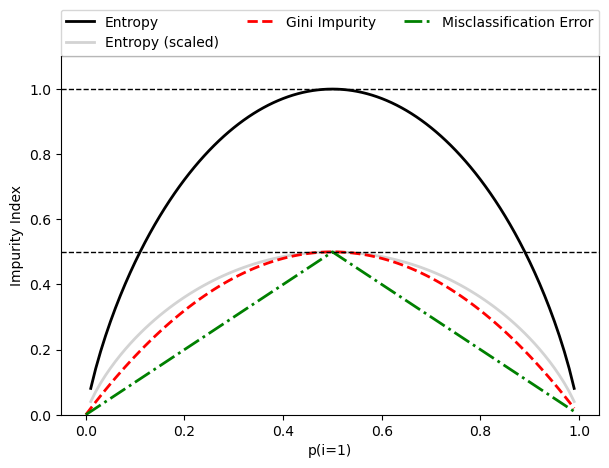

In [19]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
#    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))
    return 2*p*(1 - p)


def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()

<br>
<br>

## Decision trees with `scikit-learn`
---

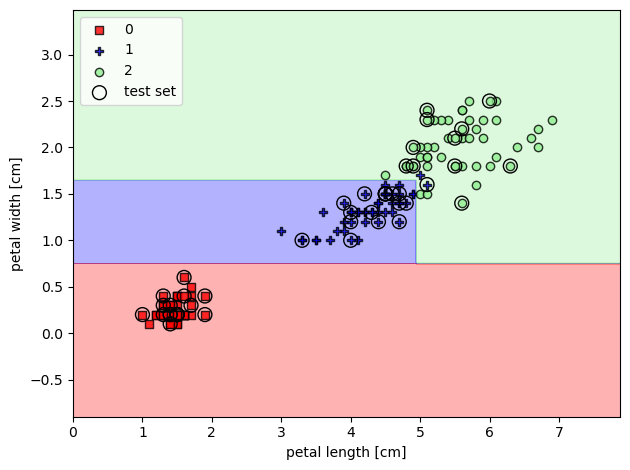

In [20]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree_clf.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_clf, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

**Notes**
* by choosing `max_depth=3` we avoid overfitting (but run the risk of getting a high bias)
* Decision trees do not require scaling of the data!

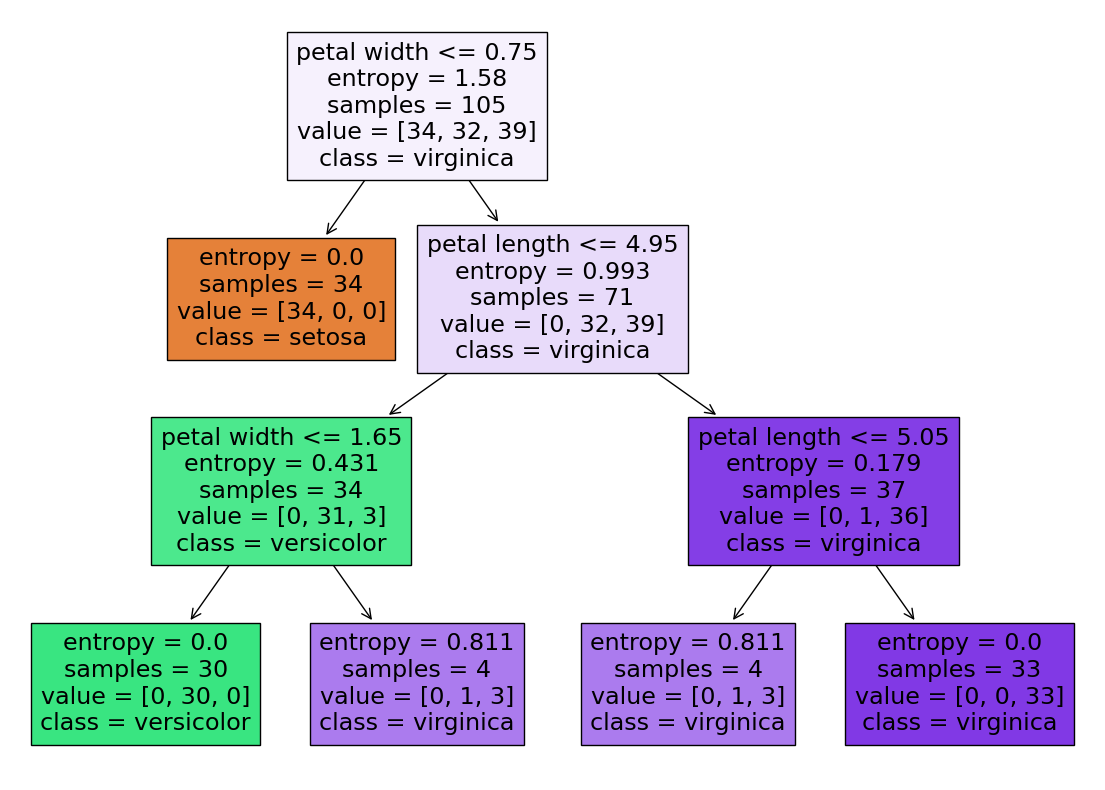

In [21]:
plt.figure(figsize=(14,10))
tree.plot_tree(tree_clf, feature_names=['petal length', 'petal width'], class_names=iris.target_names,filled=True)
plt.show()

*Note:* More extensive visualizations for decision trees, e.g. with [dtreeviz](https://github.com/parrt/dtreeviz).

## K-Nearest-Neighbor-Algorithmus - a "lazy learning"-Algorithmus
---

KNN learns exclusively on the basis of the *instances* in the training data and therefore (like decision trees) represents a [*nonparametric*](https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/) Algorithm, whereas perceptron, adaline and logistic regression are all *parametric*.

### Theory of KNN

**KNN algorithm**
1. Choose the number $k$ of instances with which the sample to be classified is to be compared, as well as a distance metric.
2. <u>Find</u> the $k$ nearest neighbors of the sample to be classified.
3. Assign the class label by majority vote.

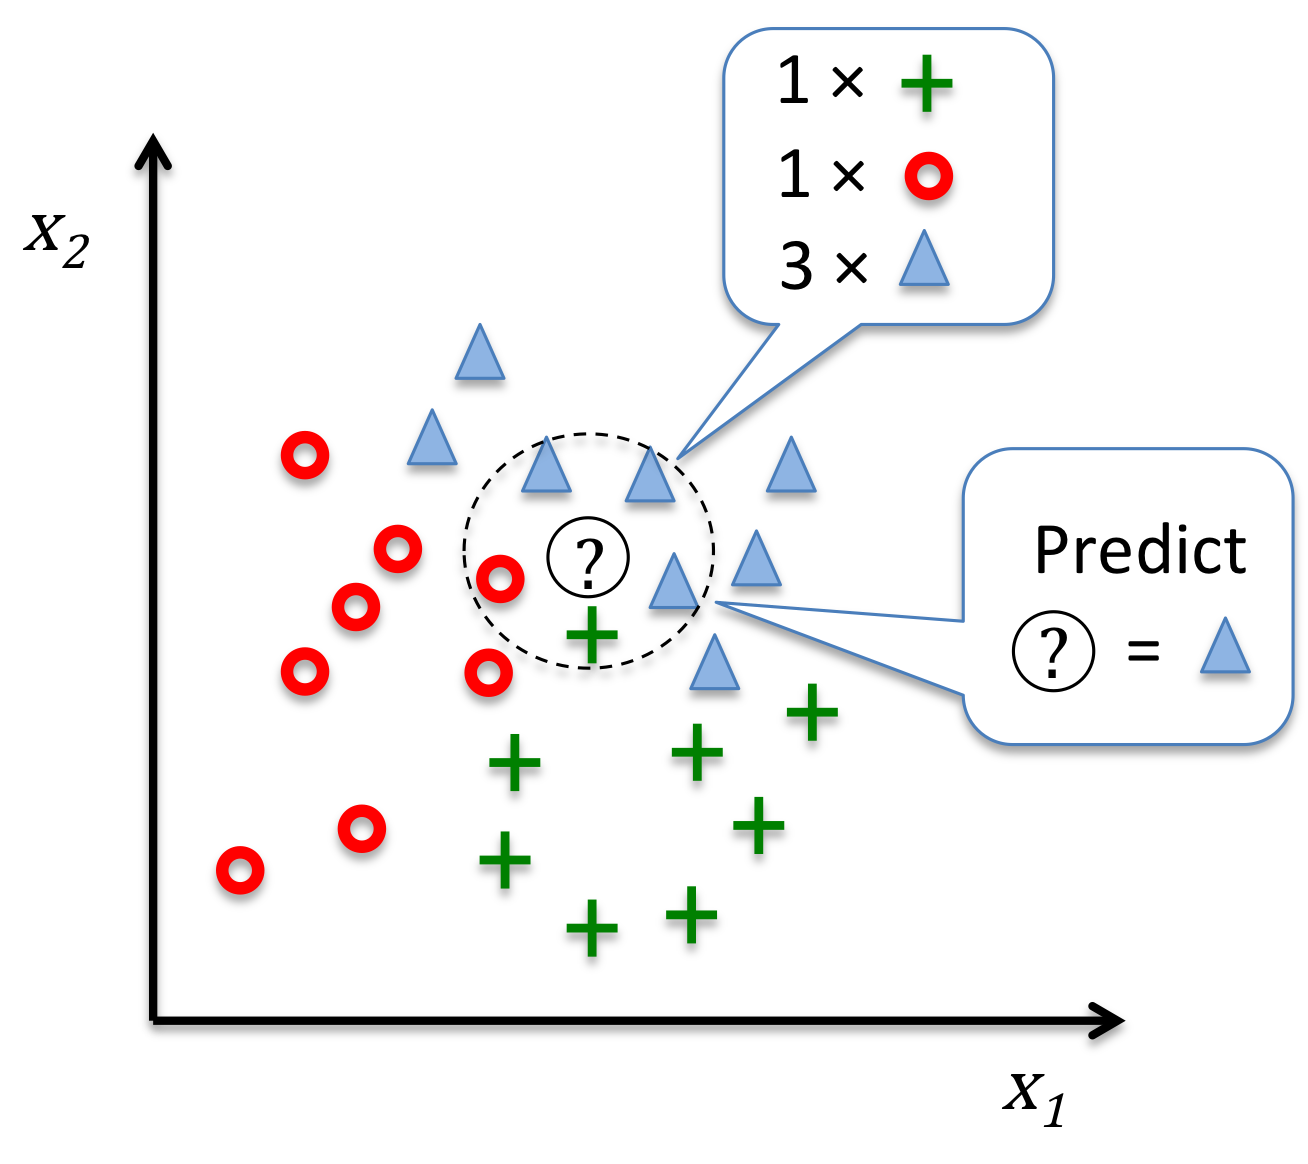

In [24]:
Image(filename='./img/03_20.png', width=400) 

*Possible problems*
* comparatively high computational complexity
* all training data must be available for classification (memory-intensive!)

## KNN mit `scikit-learn`
---

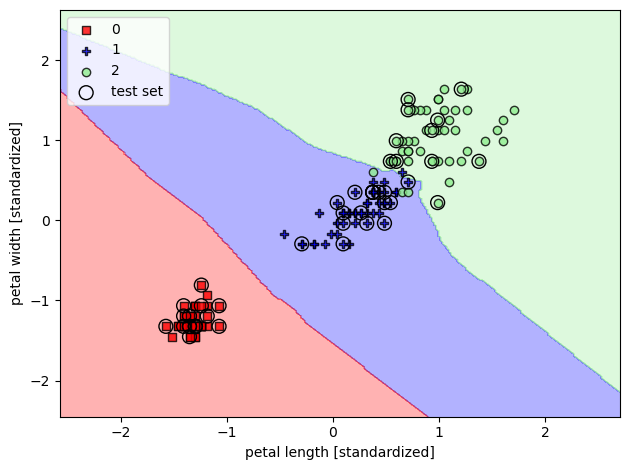

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/k_nearest_neighbors.png', dpi=300)
plt.show()

**Notes**:
* The [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance) generalizes the Euclidean and Manhattan distances (but with `p=2` as above, this is only the Euclidean distance)
* As with clustering, *standardization* or *normalization* is of utmost importance

<u>*Challenges*</u>
* Choice of $k$
* Choice of distance metric
* [Curse of dimensionality](https://de.wikipedia.org/wiki/Fluch_der_Dimensionalit%C3%A4t)

## Learning outcomes
---

If you carefully studied the materials provided within these documents, you should have a fundamental grasp of classification algorithms, including the following points:

* are used to approximate a function that maps the features of a dataset to a class,
* linear classification algorithms are quite old and originated in 1943 with the perceptron, which is modelled after the neurons in the brain,
* all kinds of classifiers can be implemented with `scikit-learn` with a common API,
* logistic regression, decision trees, and k-nearest neighbours are all different classification algorithms with individual strength and weaknesses,
* no single algorithm is better than any other algorithm; it all depends on the data (No Free Lunch Theorem).